<a href="https://colab.research.google.com/github/narutekiran1/hpc-and-dl-codes/blob/main/DL%201st%20practical%20boston%20housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = tf.keras.datasets.boston_housing

In [3]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [4]:
boston_data = boston.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [7]:
scaler = StandardScaler()

In [8]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [11]:

# Correct the model definition: remove Input layer, add activation functions
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(13,), name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, activation='relu', name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])



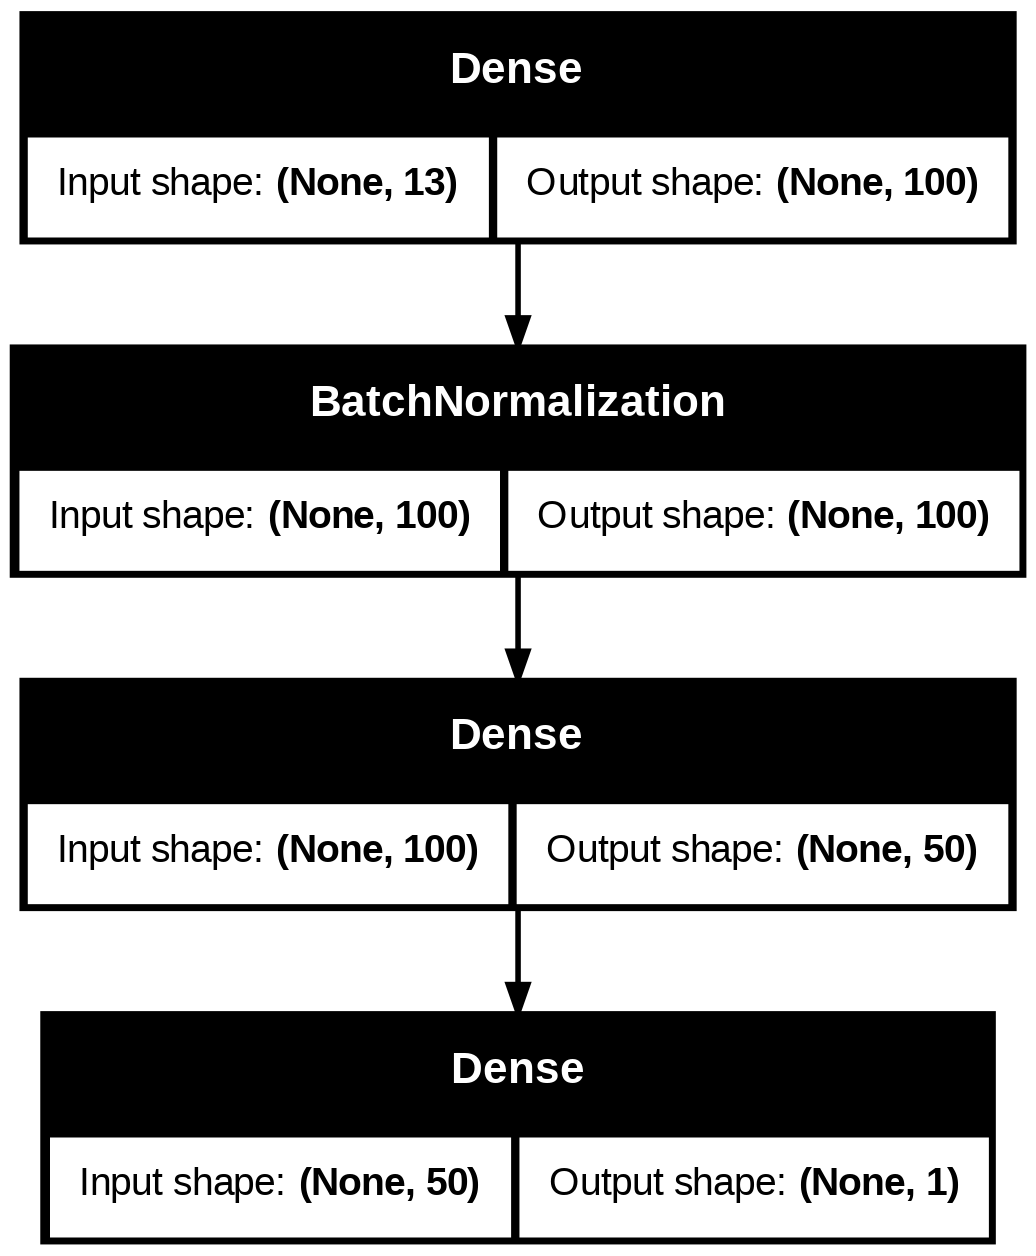

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)          │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-3                  │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-4 (Dense)          │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [14]:

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


In [15]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 568.6227 - mae: 21.8767 - val_loss: 417.9573 - val_mae: 17.8102
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 513.3292 - mae: 20.5293 - val_loss: 291.5384 - val_mae: 14.7211
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 423.9365 - mae: 18.1288 - val_loss: 267.9145 - val_mae: 14.5998
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 376.4861 - mae: 16.6099 - val_loss: 272.8906 - val_mae: 14.7780
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 270.9591 - mae: 13.5282 - val_loss: 269.8946 - val_mae: 14.5952
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 203.8616 - mae: 11.5367 - val_loss: 242.6963 - val_mae: 13.5374
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 132.9304 - mae: 8.9142 - val_loss: 177.6350 - val_mae: 11.1241
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 104.8973 - mae: 7.7309 - val_loss: 134.3582 - val_mae: 9.3612
Epoch 9/20
13/13 ━━

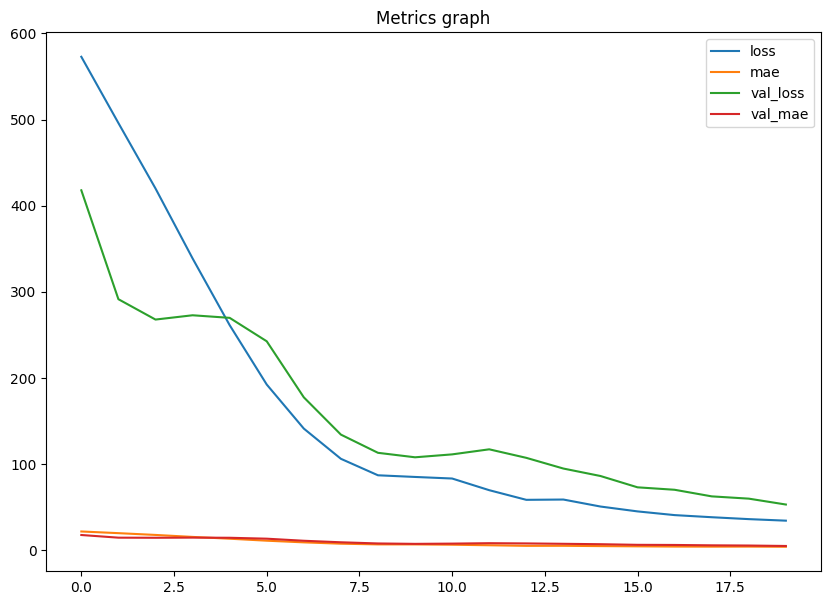

In [16]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [17]:

y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


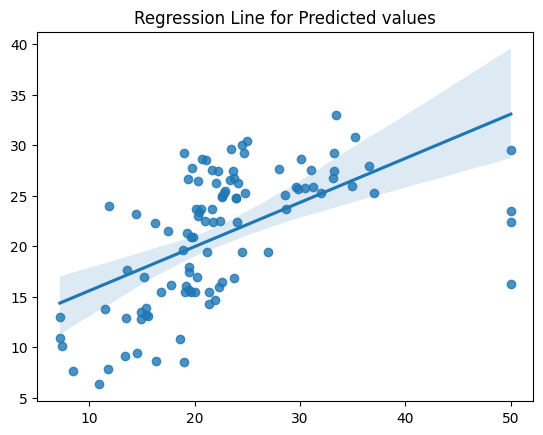

In [18]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()


In [19]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [20]:

regression_metrics_display(y_test, y_pred)

MAE is 5.073367339489507
MSE is 53.189161234670756
R2 score is 0.25298232528653797
